In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data
df = pd.read_csv('creditcard.csv')
print("Dataset loaded successfully")

# Dataset is downloaded from kaggle, the URL:
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data

Dataset loaded successfully


In [3]:
# 1
#dataframe describe
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [4]:
# columns name are like V1, V2, V3... because of the privacy policies.
# we dont have the names or what they actually are, but we can still use
# them in model training with some preprocessing steps. 

#We have to scale the data for the training part. The data structure has a large scale and many outliers,
#we may use RobustScaler for better solutions.

# But for now, we have to understand the dataset's behaviour to see the 
# relation with frauds more clearly.
#So, that is the EDA part.

In [5]:
# 2
# fraud percentage and the value counts
class_counts = df['Class'].value_counts()
print(f"\n2. Class Distribution:\n{class_counts}")
print(f"Fraud Percentage: {class_counts[1] / len(df) * 100:.4f}%")


2. Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64
Fraud Percentage: 0.1727%


In [6]:
# 3
# missing values check
print(df.isnull().sum().max())

0


In [7]:
#no missing values, no much feature engineering needed.

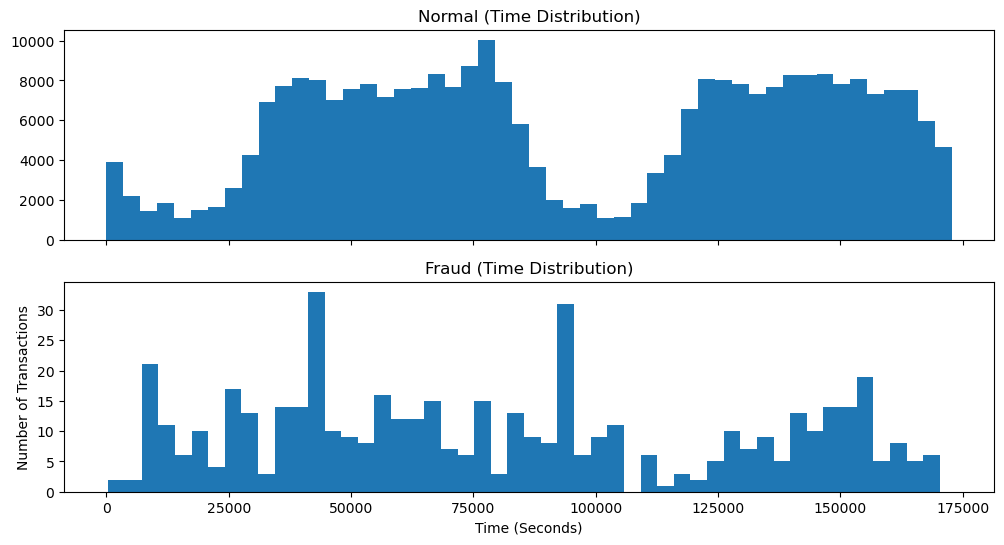

In [8]:
# 4 
# time-based Visualization
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
#normal
ax1.hist(df[df['Class'] == 0]['Time'], bins=50)
ax1.set_title('Normal (Time Distribution)')
#frauds
ax2.hist(df[df['Class'] == 1]['Time'], bins=50)
ax2.set_title('Fraud (Time Distribution)')
plt.xlabel('Time (Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

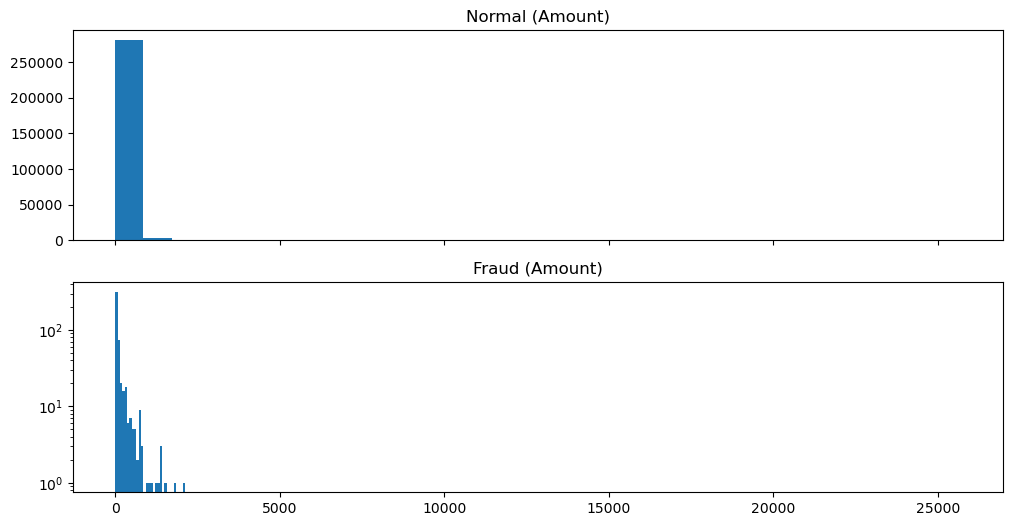

In [9]:
#  5
#amount-based visualization
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
#normal
ax1.hist(df[df['Class'] == 0]['Amount'], bins=30)
ax1.set_title('Normal (Amount)')
#fraud
ax2.hist(df[df['Class'] == 1]['Amount'], bins=30)
ax2.set_title('Fraud (Amount)')
plt.yscale('log')
plt.show()

In [10]:
#a  big scale of amount class. we have to get that in a better data shape with RobustScaler or something
#like it.

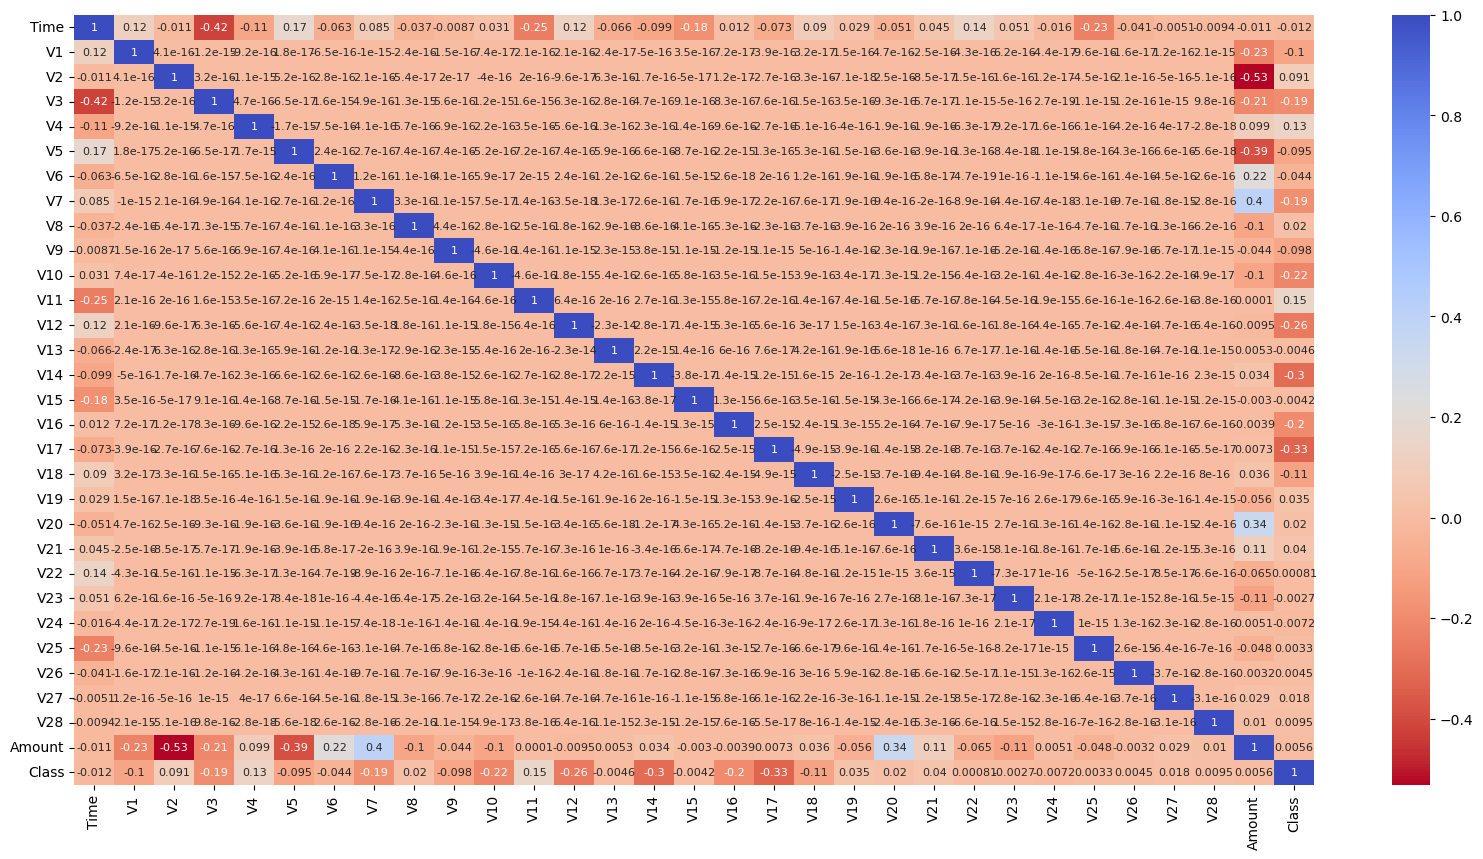

In [11]:
# 6 
#correlation map
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), cmap='coolwarm_r', annot=True, annot_kws={'size':8})
plt.show()

In [12]:
#EDA 7
correlations = df.corr(numeric_only=True)['Class']
#drop the class column, because it is always 1.0
correlations = correlations.drop('Class')
#abs method to see also the negative corr like V14 (-0.3) is more meaningful than V4(0.099) for the model.
top_5_features = correlations.abs().sort_values(ascending=False).head(10).index
bottom_5_features = correlations.abs().sort_values(ascending=True).head(10).index
print("--- Top 10 Features Most Correlated with Class ---")
print(correlations[top_5_features])
print("\n--- Top 10 Features Least Correlated with Class ---")
print(correlations[bottom_5_features]) #we remove them in feature selection

--- Top 10 Features Most Correlated with Class ---
V17   -0.326481
V14   -0.302544
V12   -0.260593
V10   -0.216883
V16   -0.196539
V3    -0.192961
V7    -0.187257
V11    0.154876
V4     0.133447
V18   -0.111485
Name: Class, dtype: float64

--- Top 10 Features Least Correlated with Class ---
V22       0.000805
V23      -0.002685
V25       0.003308
V15      -0.004223
V26       0.004455
V13      -0.004570
Amount    0.005632
V24      -0.007221
V28       0.009536
Time     -0.012323
Name: Class, dtype: float64


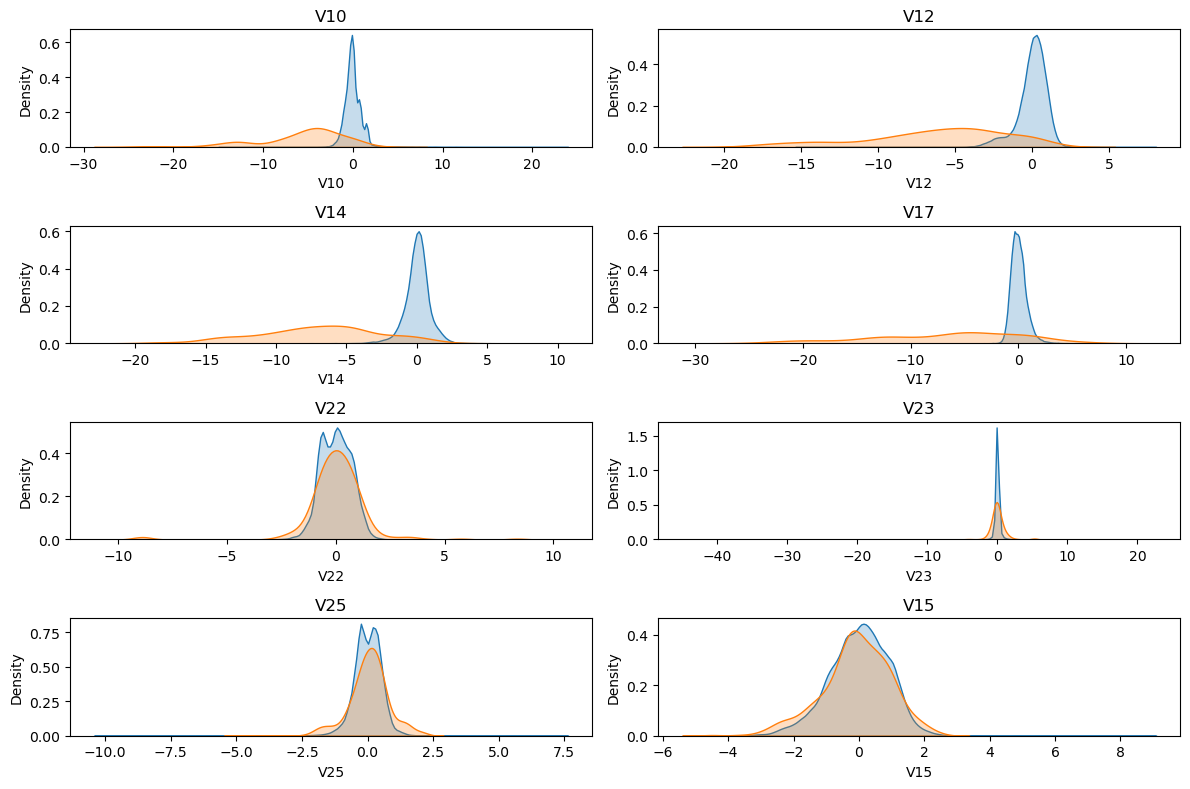

In [13]:
#V10, V12, V14, V17 have the biggest corr,
#V13, V15, V22, V28 have the least corrs,

#EDA 8 visualization of normal-fraud operations 
v_features = ['V10', 'V12', 'V14', 'V17',  #biggest corrs
              "V22", "V23", "V25", "V15"] #lowest corrs

plt.figure(figsize=(12, 8))
for i, col in enumerate(v_features):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(data=df[df['Class'] == 0][col], label='Normal', fill=True)
    sns.kdeplot(data=df[df['Class'] == 1][col], label='Fraud', fill=True)
    plt.title(f'{col}')
plt.tight_layout()
plt.show()

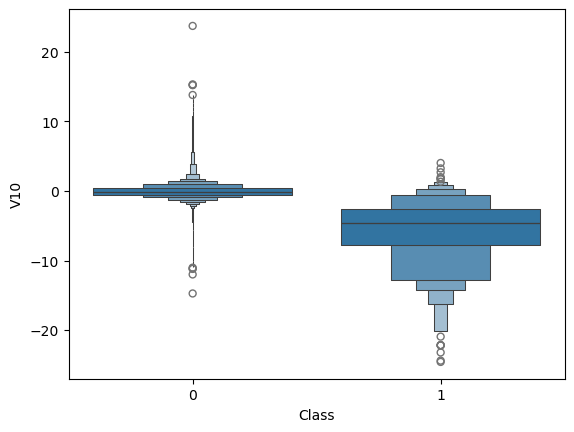

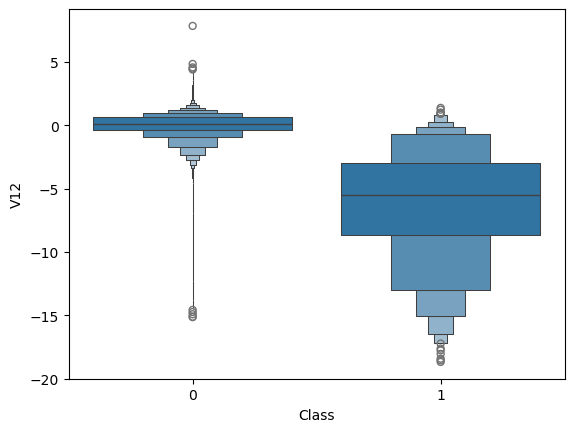

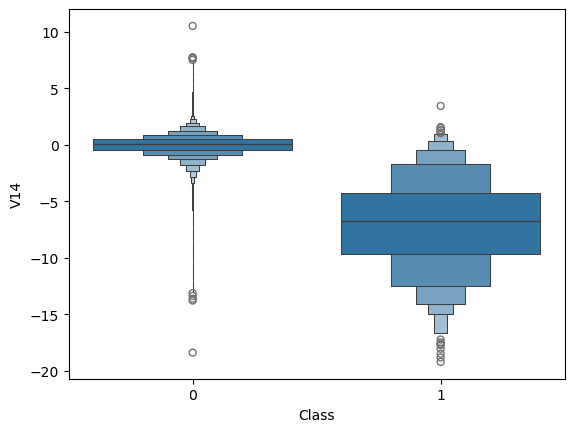

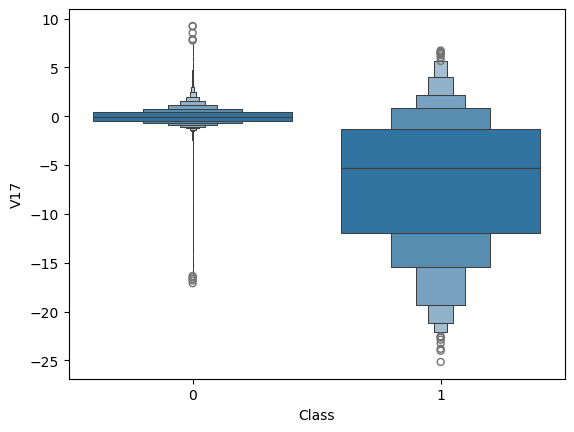

In [14]:
# EDA 9
#Correlation Plots
#Highest corr valued columns, V10 V12 V14 V17 
vFeatures = ['V10', 'V12', 'V14', 'V17']
for V in vFeatures:
    sns.boxenplot(x = "Class", y = V, data = df)
    plt.show()

In [15]:
#all of them have negative corrs with Frauds, these are a group of the
# most important data columns.

#we also use some outlier handling for amount class, we may also remove this column
#according to correlation analysis.